In [1]:
# !pip install -Uq --user nbdev
# !pip install huggingface_hub -U
!pip install -Uq --user 'timm==0.6.2.dev0'
try: import timm
except ModuleNotFoundError:
    !pip install -Uq 'timm==0.6.2.dev0'
try: import kaggle
except ModuleNotFoundError:
    !pip install -Uq --user 'kaggle'

from fastai.vision.all import *

In [2]:
timm.__version__

'0.6.2.dev0'

In [3]:
# easier to read
Path.BASE_PATh = path = Path('/notebooks/paddy/data')
train_images = path / 'train_images'
    

In [4]:
try: df = pd.read_csv(path/'train.csv')
except FileNotFoundError:
    !paddy/get_data.sh
    df = pd.read_csv(path/'train.csv')
    

## Using different architectures and image transforms

In [5]:
# WT 10 - using Jeremy benchmarks for visions learners and tasks
# https://www.kaggle.com/code/jhoward/which-image-models-are-best
def train(arch, item, batch):
    dls = ImageDataLoaders.from_folder(train_images, seed=42, valid_pct=.2, item_tfms=item, batch_tfms=batch)
    learn = vision_learner(dls, arch, metrics=error_rate).to_fp16()
    learn.fine_tune(6, .01)
    return error_rate(*learn.tta(dl=dls.valid))



### Convnext

 -different aug methods tiny

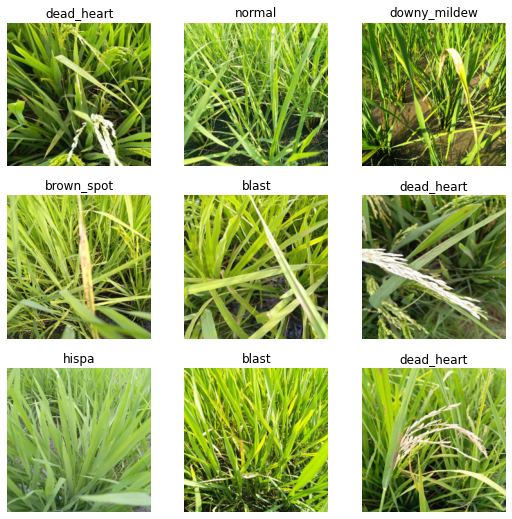

In [6]:
# quick review of the dls image transformers
dls = ImageDataLoaders.from_folder(train_images, seed=42, valid_pct=.2, 
                                            item_tfms=Resize(480, method='squish'), 
                                            batch_tfms=aug_transforms(size=224, min_scale=.75))
dls.train.show_batch()                                 

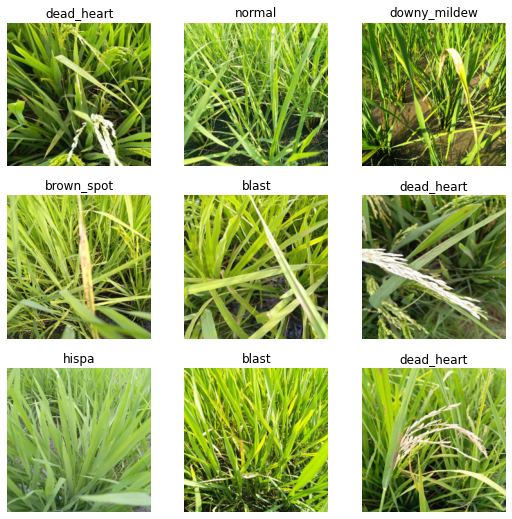

In [6]:
# quick review of the dls image transformers
dls = ImageDataLoaders.from_folder(train_images, seed=42, valid_pct=.2, 
                                            item_tfms=Resize(480, method='squish'), 
                                            batch_tfms=aug_transforms(size=224, min_scale=.75))
dls.train.show_batch()                                 

For convnext normally you will want batch sizes of 32, conv final patch size is a 32 x 32 pixel. WT10 40min

- tiny vs small experiment

In [7]:
timm.list_models(filter='convnext*')

['convnext_base',
 'convnext_base_384_in22ft1k',
 'convnext_base_in22ft1k',
 'convnext_base_in22k',
 'convnext_large',
 'convnext_large_384_in22ft1k',
 'convnext_large_in22ft1k',
 'convnext_large_in22k',
 'convnext_nano_hnf',
 'convnext_small',
 'convnext_small_384_in22ft1k',
 'convnext_small_in22ft1k',
 'convnext_small_in22k',
 'convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_hnfd',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k',
 'convnext_xlarge_384_in22ft1k',
 'convnext_xlarge_in22ft1k',
 'convnext_xlarge_in22k']

In [8]:
arch = 'convnext_tiny'
train(arch, item=Resize(480, method='squish'), 
      batch=aug_transforms(size=224, min_scale=.75))

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_1k_224_ema.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny_1k_224_ema.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.304668,0.855391,0.271504,01:00


epoch,train_loss,valid_loss,error_rate,time
0,0.690469,0.457190,0.143681,00:53
1,0.541995,0.343644,0.106679,00:52
2,0.379125,0.211264,0.070159,00:52
3,0.249088,0.182949,0.054781,00:48
4,0.159189,0.131982,0.039404,00:47
5,0.120274,0.126445,0.038443,00:49


TensorBase(0.0351)

In [7]:
arch = 'convnext_tiny'
train(arch, item=Resize(480, method='crop'), 
      batch=aug_transforms(size=224, min_scale=.75))

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_1k_224_ema.pth" to /root/.cache/torch/hub/checkpoints/convnext_tiny_1k_224_ema.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.413670,0.978580,0.288803,00:36


epoch,train_loss,valid_loss,error_rate,time
0,0.728747,0.479916,0.161461,00:39
1,0.590109,0.396797,0.134551,00:38
2,0.404856,0.215625,0.074964,00:38
3,0.295950,0.165892,0.055262,00:38
4,0.198252,0.126834,0.041807,00:38
5,0.165113,0.119515,0.039885,00:38


TensorBase(0.0380)

In [ ]:
arch = 'convnext_tiny'
train(arch, item=Resize(480, method='pad', pad_mode='zeros'), 
      batch=aug_transforms(size=224, min_scale=.75))

In [8]:
arch = 'convnext_small'
train(arch, item=Resize(480, method='squish'),
      batch=aug_transforms(size=224, min_scale=.75))

epoch,train_loss,valid_loss,error_rate,time
0,1.282543,1.052354,0.302259,00:44


epoch,train_loss,valid_loss,error_rate,time
0,0.660789,0.478141,0.159058,00:54
1,0.507857,0.316971,0.099952,00:54
2,0.355946,0.262146,0.082172,00:54
3,0.198772,0.148550,0.044210,00:54
4,0.140651,0.124066,0.037482,00:54
5,0.108520,0.108929,0.032196,00:56


TensorBase(0.0298)

In [9]:
train(arch, item=Resize((640,480)), 
      batch=aug_transforms(size=(288,224), 
                           min_scale=.75))

epoch,train_loss,valid_loss,error_rate,time
0,1.271486,0.866608,0.281115,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.632498,0.403595,0.141278,01:06
1,0.524228,0.380497,0.116771,01:06
2,0.330421,0.205280,0.064873,01:06
3,0.229343,0.179532,0.052379,01:06
4,0.156474,0.133029,0.039404,01:06
5,0.110389,0.129777,0.039404,01:07


TensorBase(0.0356)

In [10]:
train(arch, item=Resize((640,480)), 
      batch=aug_transforms(size=(320,240), 
                           min_scale=.75))

epoch,train_loss,valid_loss,error_rate,time
0,1.307389,0.816854,0.256607,01:01


epoch,train_loss,valid_loss,error_rate,time
0,0.610657,0.401352,0.140317,01:13
1,0.477283,0.359368,0.121096,01:14
2,0.329625,0.243200,0.079289,01:13
3,0.208272,0.178926,0.055742,01:14
4,0.136072,0.140379,0.037482,01:14
5,0.108196,0.128482,0.040365,01:13


TensorBase(0.0356)

### Vit small

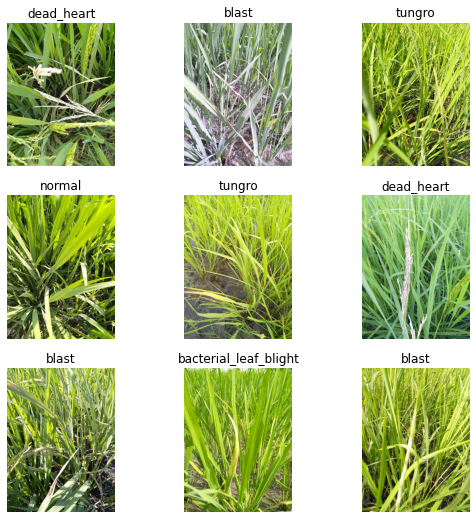

In [11]:
# quick review of the dls image transformers
dls = ImageDataLoaders.from_folder(train_images, seed=42, valid_pct=.2, 
                                   item_tfms=Resize((640,480), 
                                                    method='pad',
                                                    pad_mode='zeros'), 
                                  )
dls.train.show_batch()                                 

In [12]:
arch = 'vit_small_patch16_224'
train(arch, item=Resize((640,480), method='squish'), 
      batch=aug_transforms(size=224, min_scale=.75))

epoch,train_loss,valid_loss,error_rate,time
0,1.222839,0.757394,0.243633,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.639083,0.432511,0.144161,00:35
1,0.510296,0.338083,0.118693,00:35
2,0.377420,0.284013,0.093705,00:35
3,0.239612,0.173487,0.057184,00:35
4,0.159123,0.120551,0.038924,00:35
5,0.109503,0.114039,0.037963,00:35


TensorBase(0.0365)

In [ ]:
arch = 'vit_small_patch16_224'
train(arch, item=Resize((640,480), method='pad', pad_mode='zeros'), 
      batch=aug_transforms(size=224, min_scale=.75))

epoch,train_loss,valid_loss,error_rate,time
0,1.264750,0.733113,0.234022,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.625321,0.436745,0.152811,00:35
1,0.502308,0.367948,0.126862,00:34
2,0.360903,0.290974,0.086497,00:34
3,0.241398,0.156974,0.052379,00:33
4,0.160475,0.123972,0.038924,00:34
5,0.124130,0.117367,0.039404,00:34


### swinv2_base_window12_192

In [ ]:
# JH had to tryu diff strateguies with this one as it woudl ran out of mem
# FGS: i ran our of mem
arch = "swinv2_base_window12_192_22k"
train(arch, item=Resize(480, method='squish'), 
      batch=aug_transforms(size=192, min_scale=.75))

In [ ]:
# JH had to tryu diff strateguies with this one as it woudl ran out of mem
# FGS: i ran our of mem
arch = "swin_small_patch4_window7_224"
train(arch, item=Resize(480, method='squish'), 
      batch=aug_transforms(size=224, min_scale=.75))